In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score

# 1.load dataset

In [2]:
df=pd.read_csv("data/heart.csv")

<ul>
     <li>age</li>
     <li>sex(male=1,female=0)</li>
     <li>cp -chest pain type (4 values)</li>
     <li>trestbps-resting blood pressure in mmHg</li>
     <li>chol-serum cholestoral in mg/dl</li>
     <li>fbs-fasting blood sugar > 120 mg/dl (true=1;false=0)</li>
     <li>restecg-resting electrocardiographic results (values 0,1,2)</li>
     <li>thalach-maximum heart rate achieved</li>
     <li>exang -exercise induced angina(yes=1;no=0)</li>
     <li>oldpeak = ST depression induced by exercise relative to rest</li>
     <li>slope -the slope of the peak exercise ST segment</li>
     <li>ca -number of major vessels (0-3) colored by flourosopy</li>
     <li>thal: 3 = normal; 6 = fixed defect; 7 = reversable defect</li>
    
<ul>

# 2.Data Exploration

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


percentage of the patients who have heart disease : 54.46 %
percentage of the patients who doesn't have heart disease : 45.54 %


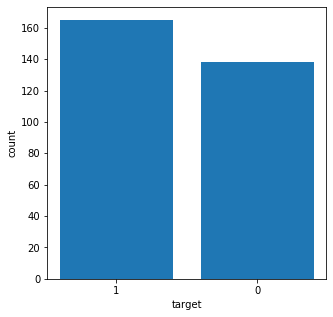

In [6]:
#visualize the number of target (have heart disease=1 ,not have=0)

target_count=df.target.value_counts()
target_count=target_count.rename({1:"1",0:"0"})
print("percentage of the patients who have heart disease : {} %".format(round((target_count[0]/df.shape[0])*100,2)))
print("percentage of the patients who doesn't have heart disease : {} %".format(round((target_count[1]/df.shape[0])*100,2)))

plt.figure(figsize=(5,5))
plt.bar(target_count.index,target_count.values)
plt.xlabel("target")
plt.ylabel("count")
plt.show()

As we see above, we have unbalanced data, we have 54% of inputs(patients) have heart disease and 45% of inputs does not have.

# 3.Data Cleaning & Preprocessing

# 3.1.Check if we have missing values

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We don't have missing values so, we will move into the next step.

# 3.2.Check if we have duplicated values

In [8]:
df.duplicated().sum()

1

In [9]:
df=df.drop_duplicates(keep="first")

In [10]:
df.duplicated().sum()

0

<h4>We have one row duplicated and I decided to delete it</h4>

# 3.3.visualize the correlations between the variables

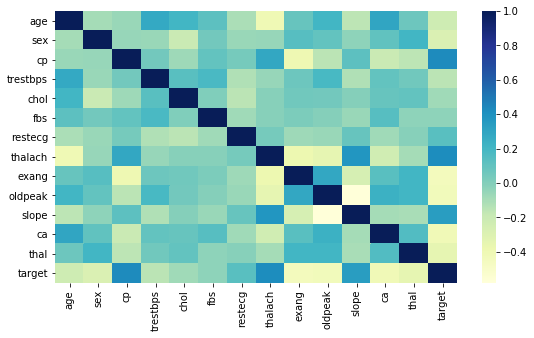

In [11]:
correlations=df.corr().round(2)
plt.figure(figsize=(9,5))
sns.heatmap(correlations,cmap = "YlGnBu")
plt.yticks()
plt.xticks()
plt.show()


as we saw in the heatmap, the correlations between the variables. 
the most important for us is a target class and based on the heatmap, the target has strong correlations with slop,thalach, and cp and strong negative correlation with ca,exang,thal, and oldpeak.
so, I will select these variables and build our model.


In [12]:
new_columns=["cp","thalach","slope","ca","thal","exang","oldpeak","target"]


In [13]:
new_df=df[new_columns]

In [14]:
new_df

,cp,thalach,slope,ca,thal,exang,oldpeak,target
0,3,150,0,0,1,0,2.3,1
1,2,187,0,0,2,0,3.5,1
2,1,172,2,0,2,0,1.4,1
3,1,178,2,0,2,0,0.8,1
4,0,163,2,0,2,1,0.6,1
...,...,...,...,...,...,...,...,...
298,0,123,1,0,3,1,0.2,0
299,3,132,1,0,3,0,1.2,0
300,0,141,1,2,3,0,3.4,0
301,0,115,1,1,3,1,1.2,0


# 3.4.convert the categorical variables to dummies variables

In [15]:
new_df=pd.get_dummies(data=new_df,columns=['cp','thal','slope'])

In [16]:
new_df.head()

,thalach,ca,exang,oldpeak,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,150,0,0,2.3,1,0,0,0,1,0,1,0,0,1,0,0
1,187,0,0,3.5,1,0,0,1,0,0,0,1,0,1,0,0
2,172,0,0,1.4,1,0,1,0,0,0,0,1,0,0,0,1
3,178,0,0,0.8,1,0,1,0,0,0,0,1,0,0,0,1
4,163,0,1,0.6,1,1,0,0,0,0,0,1,0,0,0,1


# 4.Build the ML models

In this step, I decided to run two models(LogisticRegression and LinearSVC) with a grid-search technique to hyperparameters tuning.

In [17]:
def LR_pipeline():
    """
    Build ML pipeline which includ feature scaling and build the LogisticRegression model,
    then setting the parameters which I want to tuning using grid search  technique
    finally, returns  the grid search model.
    """
    #build a ML pipeline 
    pipeline = Pipeline([
        ('scaling', StandardScaler()),
        ('clf',LogisticRegression(random_state=42))])
    #setting the parameters for the LogisticRegression model
    parameters={
    "clf__max_iter":[500000,5000000],
    "clf__solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
 
    }    
    #build the grid seach 
    GridSearchCV_model = GridSearchCV(pipeline,param_grid=parameters,cv=5)
    return GridSearchCV_model

In [18]:
def LinearSVC_pipeline():
    """
    Build ML pipeline which includ feature scaling and build the LinearSVC model,
    then setting the parameters which I want to tuning using grid search  technique
    finally, returns  the grid search model.
    """
    #build a ML pipeline 
    pipeline = Pipeline([
        ('scaling', StandardScaler()),
        ('clf',LinearSVC(random_state=42))]) 
    
    #setting the parameters for the LinearSVC model
    parameters={
    "clf__max_iter":[500000,5000000],
    "clf__loss": ["hinge","squared_hinge"] 
    }     
    
    #build the grid seach 
    GridSearchCV_model = GridSearchCV(pipeline,param_grid=parameters,cv=5)
    return GridSearchCV_model

In [19]:
def train_model(pipeline,X,Y):
    """
    This function take the pipeline and training dataset, and train this pipeline by using the training dataset
    and returns the trained model
    """
    model=pipeline.fit(X,Y)
    return model

In [20]:
def evaluate_model(name,model,X,Y):
    """
    This function take the name of the evaluation ,trained model,testing dataset
    and print the precision and recall score.
    """
    ypred=model.predict(X)
    precision=np.round(precision_score(Y,ypred,pos_label=1),2)*100
    recall=np.round(recall_score(Y,ypred,pos_label=1),2)*100
    
    if  name=="test_LR":
        print('precision score for LogisticRegression model: {}'.format(precision))
        print('recall score for LogisticRegression model: {}'.format(recall))

    elif  name=="test_LinearSVC":
        print('precision score for LinearSVC model: {}'.format(precision))
        print('recall score for LinearSVC model: {}'.format(recall))


    
    
    

In [21]:
def run_pipelines(new_df):
    """
    this function takes the new dataset after we cleaned and selected the important features, 
    and train & valuate the models.
    This function return the trained model and testing dataset
    """
    
    #split data into features and target classes
    X=new_df.drop("target",axis=1)
    Y=new_df["target"]
    
    #split data to train and test
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20, random_state=42)
    
    #run the LogisticRegression pipeline
    LR_PL=LR_pipeline()
    #train the LogisticRegression model
    LR_model= train_model(LR_PL,X_train,y_train)
    
    #evaluate the LogisticRegression model
    evaluate_model("test_LR",LR_model,X_test,y_test)
    
    #run the LinearSVC pipeline
    LinearSVC_PL=LinearSVC_pipeline()
    #train the LinearSVC model
    LinearSVC_model=train_model(LinearSVC_PL,X_train,y_train)
    
    #evaluate the LinearSVC model
    evaluate_model("test_LinearSVC",LinearSVC_model,X_test,y_test)
    
    return LR_model,LinearSVC_model,X_test,y_test

# 5.Results

# 5.1 Precision and Recall score

In [22]:
LR_model,LinearSVC_model,X_test,y_test=run_pipelines(new_df)

precision score for LogisticRegression model: 87.0
recall score for LogisticRegression model: 84.0
precision score for LinearSVC model: 88.0
recall score for LinearSVC model: 88.0


# 5.2.confusion matrix 

# 5.2.1.confusion matrix of LogisticRegression model

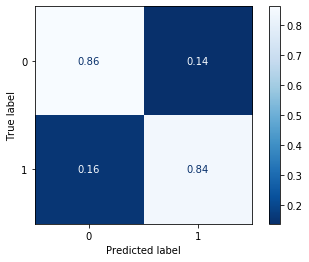

In [23]:
plot_confusion_matrix(LR_model,X_test,y_test,display_labels=["0","1"],cmap=plt.cm.Blues_r,normalize='true')
plt.show()

# 5.2.2.confusion matrix of LinearSVC model

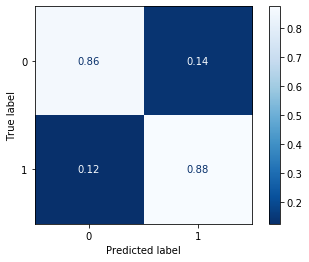

In [24]:
plot_confusion_matrix(LinearSVC_model,X_test,y_test,display_labels=["0","1"],cmap=plt.cm.Blues_r,normalize='true')
plt.show()

# 5.3 Select the best model and parameters 

I decided to select the LinearSVC model because we got on the best precision and recall score,and especially for this problem(heart disease), we focus on the patients who have a disease and the classifier classify it as doesn't have.
and we notice the confusion matrix of LinearSVC has a false negative value 12% compared to the false negative of LogisticRegression it is 16% so, we can use LinearSVC as a classifier for this problem.

In [25]:
#display the best parameter for LinearSVC
LinearSVC_model.best_estimator_

Pipeline(memory=None,
         steps=[('scaling',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=500000,
                           multi_class='ovr', penalty='l2', random_state=42,
                           tol=0.0001, verbose=0))],
         verbose=False)